The goal of this assignment is to conduct a study that compares the performance of various classification algorithms on QSAR dataset.

ML Handling Imbalanced Data with SMOTE and near miss algorithm : geeksforgeeks
When to use SMOTE or ADASYN beofre or after train test split : Kaggle
https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati

# Python Project - QSAR 🐍 

---

## Nader Narcisse 🐙

### *Table of Contents*
  - [Abstract](#Abstract)
  - [1) Data Collection](#Data_Collection) 🗄️
  - [1) Data Formating](#Data_Formating) 🗄️
  - [2) Superficial Data Preprocessing](#Superficial_Data_Preprocessing) 🧹
      - 2.1 Missing Data
      - 2.2 Target Enconding
  - [3) Exploratory Data Analysis (EDA)](#Exploratory_Data_Analysis(EDA))
      - 3.1 Outliers
      - 3.2 Multicollinearity
      - 3.3 Feature Engineering
  - [4) Modeling](#Models)
     - 4.1 Data Augmentation SMOTE
     - 4.2 Models
     - 4.3 Models tuning
     - 4.4 Best model selection

<a name="Abstract">

## Abstract
---

The Goal of this project is to use **QSAR-Data (Quantitative Structure Ability Relationship)** from chemical compounds and classify biodegradable substances. We are dealing with a **classication problem.** We are trying to predict a discrete value output: ***Degradable*** and ***Non Degradable.***

Since the compounds can last hundreds of years before beding decomposed, degradability will take time accordingly. This is where the approach of QSAR begins to shine. Just by looking at relatively quick to obtain molecular propreties, the molecules behavior (in this case biodegradability) can be estimated. Thus helping to ensue correct disposal of chemicals and saving the environment, while also reducing expensive longterm experiments.


The challenge here personnally is that I have no experience nor solid chemical background knowledge. This project was definitely intriguing for me. I had to do research on the mattter to at least have a solid understanding on this dataset.

DATASET LINK : https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

<a name="Data Collection">

# 1) Data Collection
---

Importing standard modules.

In [477]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.base import clone
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

First glance at the dataset

In [478]:
df = pd.read_csv("biodeg.csv", sep = ";", header = None)

In [479]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [480]:
df.shape

(1055, 42)

We can see that there are total 41 features and 1 target class named 'experimental_class' in this dataset. Also, there are 1055 instances.

<a name="Data_Formating">

# 2) Data Formating
---

The DataFrame is missing column descriptions. The following script is opening the .txt file, with the description that has been copied from the web site, and was turned into a Panda DataFrame.

In [481]:
f = open("Text_Description.txt", "r")
description_df = pd.DataFrame(columns = ["molecular_descriptors", "description"])
info = "start"
while len(info):
    info = f.readline()
    if not info: 
        break
    info = info.split(") ",1)[1][:-2]
    short = info.split(": ",1)[0]
    #description = info.split(": ",1)[1]
    description_df.loc[len(description_df)] = info.split(": ",1)

In [482]:
description_df #Column descriptions for each molecular_descriptors shows up

,molecular_descriptors,description
0,SpMax_L,Leading eigenvalue from Laplace matrix
1,J_Dz(e),Balaban-like index from Barysz matrix weighted...
2,nHM,Number of heavy atoms
3,F01[N-N],Frequency of N-N at topological distance 1
4,F04[C-N],Frequency of C-N at topological distance 4
5,NssssC,Number of atoms of type ssssC
6,nCb-,Number of substituted benzene C(sp2)
7,C%,Percentage of C atoms
8,nCp,Number of terminal primary C(sp3)
9,nO,Number of oxygen atoms


In [483]:
df.columns = description_df.molecular_descriptors #assign describtions to column header

In [484]:
df.head()

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [485]:
df.info() #Valid Dtype for Machine learning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

In [486]:
df.describe()

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


We have a lot of 0 values in the columns

<a name="Data_Preprocessing">

# 3) Data Preprocessing
---

## 3.1 Missing values

In [487]:
df.isnull().sum()

molecular_descriptors
SpMax_L               0
J_Dz(e)               0
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                0
nCb-                  0
C%                    0
nCp                   0
nO                    0
F03[C-N]              0
SdssC                 0
HyWi_B(m)             0
LOC                   0
SM6_L                 0
F03[C-O]              0
Me                    0
Mi                    0
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)           0
nCIR                  0
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A               0
Psi_i_1d              0
B04[C-Br]             0
SdO                   0
TI2_L                 0
nCrt                  0
C-026                 0
F02[C-N]              0
nHDon                 0
SpMax_B(m)            0
Psi_i_A               0
nN                    0
SM6_B(m)              0
nArCOOR               0
nX                

In [488]:
df.isnull().sum().sum()

0

Fortunately, there is no missing data we can proceed with the next step

## 3.2 Target Encoding

Since it is a classification problem, **Ready Degradability** will be encoded as 1, wheres as **Non-Ready Degradability** will be decoded as 0

In [489]:
df.replace(["RB","NRB"],[1,0], inplace = True) #apply decoding

In [490]:
#rename target for better readability
df.rename(columns = {"experimental class": "degradable"}, inplace = True);

In [491]:
df.head(5)

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


<a name="Data_Processing">

# 4) Data Processing
---

## 4.1 Removing Outliers and Standardizing
If you remove outliers after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)

In [492]:
from sklearn.preprocessing import StandardScaler
y = df['degradable']
X_features = df.drop('degradable', axis=1)

In [493]:
from sklearn.neighbors import LocalOutlierFactor

columns= df.columns.tolist()

lof= LocalOutlierFactor()
y_out=lof.fit_predict(X_features)
y_out[0:30]

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [494]:
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

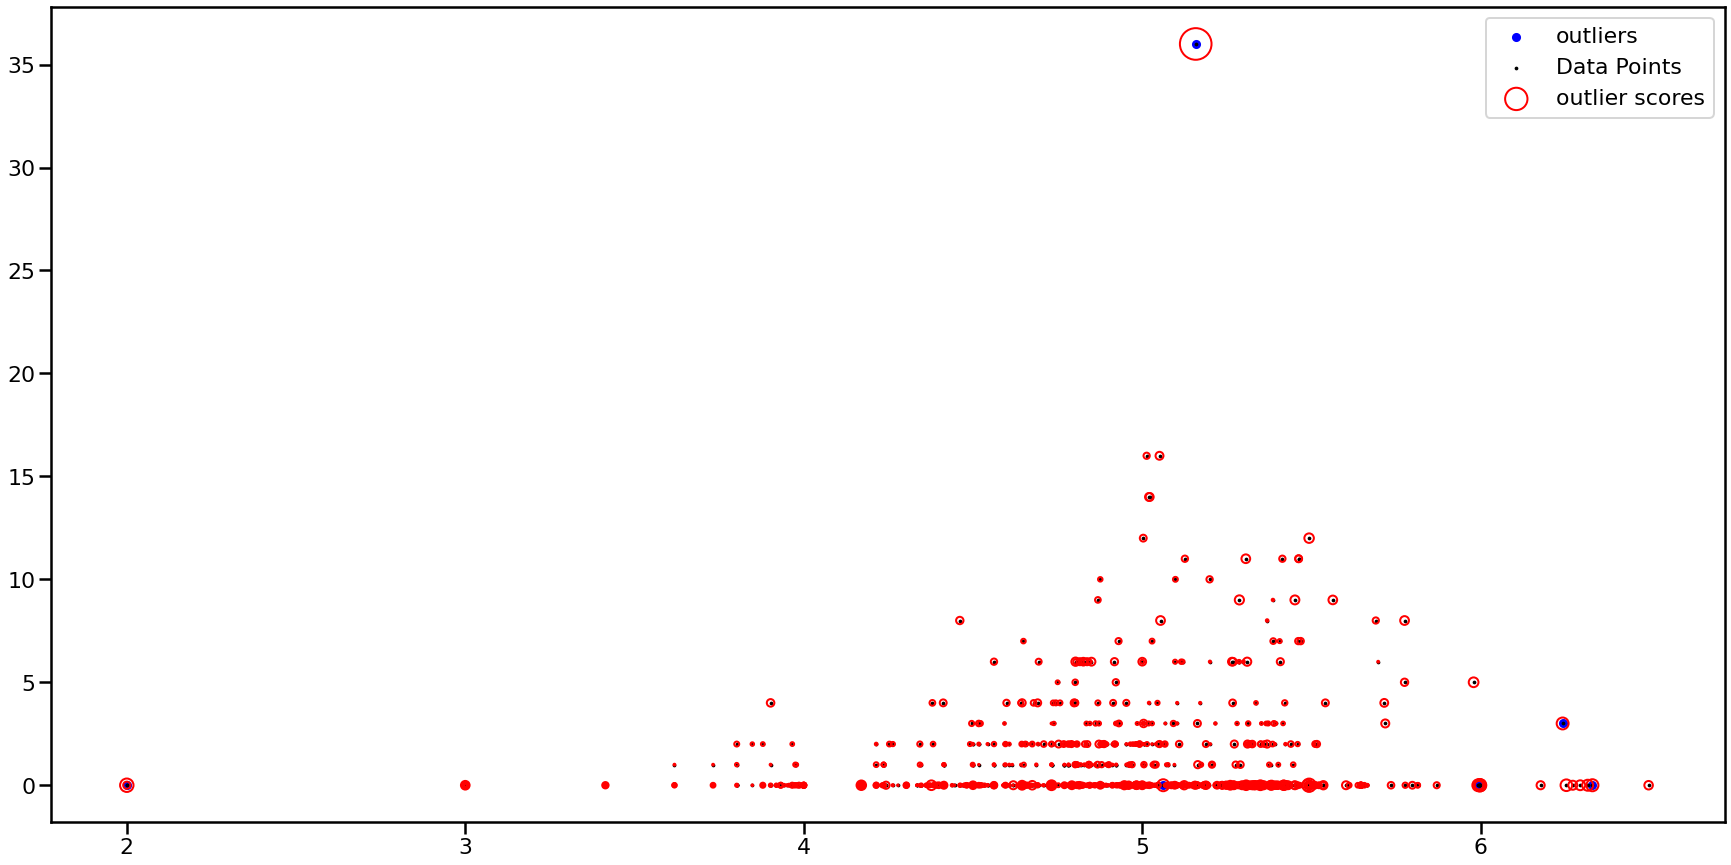

In [495]:
plt.figure(figsize=(30,15))
plt.scatter(X_features.iloc[outlier_index,0], X_features.iloc[outlier_index,4] ,color="blue",s=50,label="outliers")
plt.scatter(X_features.iloc[:,0],X_features.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X_features.iloc[:,0],X_features.iloc[:,4],s=1000*radius,edgecolors="r",facecolors="none",label="outlier scores")
plt.legend();

In [496]:
X_features= X_features.drop(outlier_index)
y= y.drop(outlier_index).values

In [497]:
scaler = StandardScaler()
X_transform = scaler.fit_transform(X_features)
X_transform_pd = pd.DataFrame(X_transform, columns = X_features.columns)
X_transform_pd.head(10)

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,-1.609133,-0.473696,-0.496519,-0.1648,-0.458694,-0.281436,-0.757140,-0.625381,0.339676,-1.018978,-0.506331,0.258852,-0.633922,1.521567,-1.031628,-0.815356,-1.174058,0.401879,-0.078462,-0.234045,-0.131501,-0.405384,-0.816611,-0.20453,-0.412338,-0.155325,-1.280163,0.071629,-0.165846,-0.742392,0.866175,-0.206834,-0.582472,-0.567521,-0.766576,-0.967447,-1.532511,-0.639872,-1.109223,-0.161252,-0.346998
1,-1.138749,-1.202076,-0.496519,-0.1648,-0.458694,-0.281436,-0.757140,-0.691530,-0.194611,-0.455036,-0.506331,0.258852,-1.757245,0.049772,-1.342508,-0.590801,-0.527556,0.472731,-0.078462,-0.234045,-0.131501,-1.431123,-0.152400,-0.20453,-0.412338,-0.155325,0.003525,-1.307649,-0.165846,-0.742392,-0.537291,-0.206834,-0.582472,-0.567521,-0.766576,-0.601467,-0.933269,-0.639872,-1.105984,-0.161252,-0.346998
2,-1.584771,0.234216,-0.496519,-0.1648,-0.458694,-0.281436,-0.757140,-1.143550,0.339676,1.236791,-0.506331,0.258852,-0.332628,1.566090,-0.911288,-0.815356,-0.081692,0.756139,-0.078462,-0.234045,-0.131501,-1.558019,-0.816611,-0.20453,-0.412338,-0.155325,-1.234642,-0.050261,-0.165846,-0.742392,1.057622,-0.206834,-0.582472,-0.567521,0.030480,-0.840454,-0.216092,-0.639872,-0.827448,-0.161252,-0.346998
3,-3.331377,-0.449817,-0.496519,-0.1648,-0.458694,-0.281436,-0.757140,-1.882215,-0.728899,0.108907,-0.506331,0.258852,-2.385957,-0.554466,-3.714778,-0.815356,2.125334,1.287529,-0.078462,-0.234045,-0.131501,-2.277093,-0.816611,-0.20453,-0.412338,-0.155325,-3.638143,6.884617,-0.165846,-0.040751,-0.636824,-0.206834,-0.582472,-0.567521,0.030480,-0.870452,3.900507,-0.639872,-1.565084,-0.161252,-0.346998
4,-1.015062,0.415142,-0.496519,-0.1648,-0.458694,-0.281436,-0.757140,-0.845878,0.339676,1.236791,-0.506331,-0.098562,-0.036558,1.779799,-0.445525,-0.366245,-0.193158,0.579009,-0.078462,-0.234045,-0.131501,-1.082160,-0.816611,-0.20453,-0.412338,-0.155325,-1.038902,-0.011769,-0.165846,0.125995,1.389558,-0.206834,-0.582472,-0.567521,-0.766576,-0.565469,-0.235217,-0.639872,-0.501949,-0.161252,-0.346998
5,-1.015062,0.458352,-0.496519,-0.1648,-0.458694,-0.281436,-0.757140,-0.934077,0.339676,1.236791,-0.506331,-0.103838,-0.273414,1.485949,-0.607093,-0.590801,0.029774,0.649861,-0.078462,-0.234045,-0.131501,-1.272504,-0.816611,-0.20453,-0.412338,-0.155325,-1.061663,-0.050261,-0.165846,0.119953,0.988568,-0.206834,-0.582472,-0.567521,-0.766576,-0.565469,0.005436,-0.639872,-0.582109,-0.161252,-0.346998
6,0.416705,2.503880,0.214931,-0.1648,-0.458694,-0.281436,-0.757140,-2.863427,-0.728899,0.672849,-0.506331,0.258852,-1.041453,-0.803794,-0.301785,-0.815356,1.768643,0.791565,-0.078462,-0.234045,-0.131501,-1.209056,-0.816611,-0.20453,-0.412338,-0.155325,-0.970621,2.862260,-0.165846,0.799608,-0.890658,-0.206834,-0.582472,-0.567521,0.030480,0.795455,3.235923,-0.639872,0.550659,-0.161252,-0.346998
7,-0.473464,0.965628,-0.496519,-0.1648,-0.458694,-0.281436,-0.757140,-0.603332,0.873963,0.108907,-0.506331,0.207416,-0.090547,1.417257,-0.158045,0.307422,-0.728195,0.401879,-0.078462,-0.234045,-0.131501,-0.638026,-0.816611,-0.20453,-0.412338,-0.155325,-0.428923,-0.011769,-0.165846,0.190360,0.580434,-0.206834,-0.582472,-0.567521,-0.766576,-0.537471,-0.652773,-0.639872,-0.544863,-0.161252,-0.346998
8,-0.340407,0.015007,-0.496519,-0.1648,-0.458694,-0.281436,0.169139,0.807850,0.339676,-1.018978,-0.506331,0.258852,-0.870778,-0.609165,-0.432154,-0.815356,-0.995713,-0.554624,-0.078462,-0.234045,-0.131501,0.937593,-0.152400,-0.20453,-0.412338,-0.155325,-0.174006,0.264086,-0.165846,-0.742392,-0.762551,-0.206834,-0.582472,-0.567521,-0.766576,-0.290485,-1.012956,-0.639872,-0.553770,-0.161252,-0.346998
9,0.491667,0.689058,-0.496519,-0.1648,0.023511,-0.281436,0.169139,0.455055,-0.728899,1.2367

In [498]:
X_transform_pd.head(10).style.background_gradient(cmap='Blues')

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,-1.609133,-0.473696,-0.496519,-0.164800,-0.458694,-0.281436,-0.757140,-0.625381,0.339676,-1.018978,-0.506331,0.258852,-0.633922,1.521567,-1.031628,-0.815356,-1.174058,0.401879,-0.078462,-0.234045,-0.131501,-0.405384,-0.816611,-0.204530,-0.412338,-0.155325,-1.280163,0.071629,-0.165846,-0.742392,0.866175,-0.206834,-0.582472,-0.567521,-0.766576,-0.967447,-1.532511,-0.639872,-1.109223,-0.161252,-0.346998
1,-1.138749,-1.202076,-0.496519,-0.164800,-0.458694,-0.281436,-0.757140,-0.691530,-0.194611,-0.455036,-0.506331,0.258852,-1.757245,0.049772,-1.342508,-0.590801,-0.527556,0.472731,-0.078462,-0.234045,-0.131501,-1.431123,-0.152400,-0.204530,-0.412338,-0.155325,0.003525,-1.307649,-0.165846,-0.742392,-0.537291,-0.206834,-0.582472,-0.567521,-0.766576,-0.601467,-0.933269,-0.639872,-1.105984,-0.161252,-0.346998
2,-1.584771,0.234216,-0.496519,-0.164800,-0.458694,-0.281436,-0.757140,-1.143550,0.339676,1.236791,-0.506331,0.258852,-0.332628,1.566090,-0.911288,-0.815356,-0.081692,0.756139,-0.078462,-0.234045,-0.131501,-1.558019,-0.816611,-0.204530,-0.412338,-0.155325,-1.234642,-0.050261,-0.165846,-0.742392,1.057622,-0.206834,-0.582472,-0.567521,0.030480,-0.840454,-0.216092,-0.639872,-0.827448,-0.161252,-0.346998
3,-3.331377,-0.449817,-0.496519,-0.164800,-0.458694,-0.281436,-0.757140,-1.882215,-0.728899,0.108907,-0.506331,0.258852,-2.385957,-0.554466,-3.714778,-0.815356,2.125334,1.287529,-0.078462,-0.234045,-0.131501,-2.277093,-0.816611,-0.204530,-0.412338,-0.155325,-3.638143,6.884617,-0.165846,-0.040751,-0.636824,-0.206834,-0.582472,-0.567521,0.030480,-0.870452,3.900507,-0.639872,-1.565084,-0.161252,-0.346998
4,-1.015062,0.415142,-0.496519,-0.164800,-0.458694,-0.281436,-0.757140,-0.845878,0.339676,1.236791,-0.506331,-0.098562,-0.036558,1.779799,-0.445525,-0.366245,-0.193158,0.579009,-0.078462,-0.234045,-0.131501,-1.082160,-0.816611,-0.204530,-0.412338,-0.155325,-1.038902,-0.011769,-0.165846,0.125995,1.389558,-0.206834,-0.582472,-0.567521,-0.766576,-0.565469,-0.235217,-0.639872,-0.501949,-0.161252,-0.346998
5,-1.015062,0.458352,-0.496519,-0.164800,-0.458694,-0.281436,-0.757140,-0.934077,0.339676,1.236791,-0.506331,-0.103838,-0.273414,1.485949,-0.607093,-0.590801,0.029774,0.649861,-0.078462,-0.234045,-0.131501,-1.272504,-0.816611,-0.204530,-0.412338,-0.155325,-1.061663,-0.050261,-0.165846,0.119953,0.988568,-0.206834,-0.582472,-0.567521,-0.766576,-0.565469,0.005436,-0.639872,-0.582109,-0.161252,-0.346998
6,0.416705,2.503880,0.214931,-0.164800,-0.458694,-0.281436,-0.757140,-2.863427,-0.728899,0.672849,-0.506331,0.258852,-1.041453,-0.803794,-0.301785,-0.815356,1.768643,0.791565,-0.078462,-0.234045,-0.131501,-1.209056,-0.816611,-0.204530,-0.412338,-0.155325,-0.970621,2.862260,-0.165846,0.799608,-0.890658,-0.206834,-0.582472,-0.567521,0.030480,0.795455,3.235923,-0.639872,0.550659,-0.161252,-0.346998
7,-0.473464,0.965628,-0.496519,-0.164800,-0.458694,-0.281436,-0.757140,-0.603332,0.873963,0.108907,-0.506331,0.207416,-0.090547,1.417257,-0.158045,0.307422,-0.728195,0.401879,-0.078462,-0.234045,-0.131501,-0.638026,-0.816611,-0.204530,-0.412338,-0.155325,-0.428923,-0.011769,-0.165846,0.190360,0.580434,-0.206834,-0.582472,-0.567521,-0.766576,-0.537471,-0.652773,-0.639872,-0.544863,-0.161252,-0.346998
8,-0.340407,0.015007,-0.496519,-0.164800,-0.458694,-0.281436,0.169139,0.807850,0.339676,-1.018978,-0.506331,0.258852,-0.870778,-0.609165,-0.432154,-0.815356,-0.995713,-0.554624,-0.078462,-0.234045,-0.131501,0.937593,-0.152400,-0.204530,-0.412338,-0.155325,-0.174006,0.264086,-0.165846,-0.742392,-0.762551,-0.206834,-0.582472,-0.567521,-0.766576,-0.290485,-1.012956,-0.639872,-0.553770,-0.161252,-0.346998
9,0.491667,0.689058,-0.496519,-0.164800,0.023511,-0.281436,0.169

## 4.2 Multicollinearity

Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related.
There's a known problem with variable

In the next step multicolinearity is checked. This becomes a problem when running Regression models. Thus, highly cocorrelated features (|r| > 0.90) will be dropped. When deciding which of two correlated features to keep, the one with the higher correlation to the traget and therefore higher prediction value will be keept.

In [499]:
df.corr().style.background_gradient(cmap='Reds')

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
molecular_descriptors,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpMax_L,1.000000,0.232683,0.261817,0.022219,0.185560,0.446789,0.423223,0.381464,0.202214,0.260533,0.183770,-0.105155,0.642858,-0.113169,0.911546,0.415169,0.276838,-0.118332,-0.114219,0.114261,0.234538,0.230438,0.171793,-0.010448,0.138769,0.054298,0.918928,0.011154,0.036602,0.259498,-0.035091,0.232447,0.311775,0.137806,0.033485,0.305638,0.101423,0.056802,0.489765,0.086938,0.339627,-0.396138
J_Dz(e),0.232683,1.000000,0.067649,-0.094366,-0.186095,0.351183,-0.260477,-0.300082,0.150766,0.192826,-0.141810,-0.192385,0.043378,0.310928,0.115325,0.119643,0.491129,0.444704,-0.033522,0.126076,0.320962,-0.257301,-0.215989,-0.005467,-0.006008,-0.142424,0.020384,-0.001269,-0.041310,0.110712,-0.042344,-0.203189,-0.113457,-0.181558,0.009668,0.085867,0.513404,-0.088993,0.087903,-0.071860,0.389997,-0.001900
nHM,0.261817,0.067649,1.000000,0.022182,0.003350,0.068106,0.258438,0.097963,-0.122079,-0.106941,-0.016309,0.059623,0.484630,-0.095576,0.223020,-0.046508,0.368722,-0.321443,-0.002863,-0.042696,0.145184,0.508299,0.086612,0.321391,0.544763,-0.050872,0.222939,0.004635,0.294238,-0.076078,-0.060299,0.203298,0.439112,-0.036748,-0.135023,0.458958,0.051879,-0.042725,0.572485,-0.044127,0.542703,-0.299107
F01[N-N],0.022219,-0.094366,0.022182,1.000000,0.449388,0.006723,0.191410,-0.038907,0.024662,0.033042,0.424914,-0.052004,0.087563,-0.068655,0.077165,0.008011,0.026176,0.070722,0.386467,0.019529,-0.022479,-0.008287,0.040820,-0.033941,0.107964,0.308158,0.050725,-0.003702,-0.027523,0.120540,0.072945,-0.033625,0.212653,0.501351,0.134878,-0.005597,0.023329,0.462634,0.040402,-0.015143,0.000753,-0.103290
F04[C-N],0.185560,-0.186095,0.003350,0.449388,1.000000,0.001928,0.372453,0.146439,0.007436,0.086099,0.870518,-0.091424,0.281696,-0.101403,0.298373,0.090350,0.005295,-0.036033,0.032674,0.213351,-0.011908,0.085430,0.524473,-0.064792,0.102038,0.382455,0.269421,0.001478,-0.044111,0.284368,0.091057,-0.035533,0.329136,0.789358,0.209706,0.041273,-0.030193,0.745717,0.147088,-0.043254,-0.021033,-0.234618
NssssC,0.446789,0.351183,0.068106,0.006723,0.001928,1.000000,0.079107,-0.062045,0.450833,0.042820,-0.020331,-0.164030,0.269141,-0.004951,0.404542,0.134824,0.389575,0.485792,-0.022657,-0.040700,0.494523,-0.213147,0.030420,-0.014374,-0.013056,-0.006959,0.335782,0.003791,-0.028139,-0.023455,0.046658,0.223982,-0.030407,-0.037735,0.017497,0.014806,0.299743,-0.076978,0.121235,-0.037847,0.676194,-0.170450
nCb-,0.423223,-0.260477,0.258438,0.191410,0.372453,0.079107,1.000000,0.599244,0.135601,0.115968,0.333183,-0.096966,0.518167,-0.311625,0.509044,0.281869,0.061432,-0.452130,-0.028561,0.182113,-0.050939,0.433985,0.265592,0.089057,0.279971,0.183080,0.515108,0.006773,0.169451,0.204641,-0.014669,-0.122866,0.800326,0.330718,0.113821,0.224343,-0.076045,0.183804,0.402740,0.112426,0.126977,-0.337268
C%,0.381464,-0.300082,0.097963,-0.038907,0.146439,-0.062045,0.599244,1.000000,-0.225157,-0.146550,0.108752,0.025884,0.352416,-0.384364,0.429790,0.059581,-0.089817,-0.682582,-0.135041,0.041622,-0.086156,0.623108,0.262763,0.035731,0.251518,0.138392,0.568842,0.017590,0.144677,0.027982,-0.134109,0.049967,0.409265,0.095466,-0.237641,0.149713,-0.249861,-0.091935,0.280505,0.117358,0.046641,-0.201603
nCp,0.202214,0.150766,-0.122079,0.024662,0.007436,0.450833,0.135601,-0.225157,1.000000,0.189120,-0.015423,0.043502,0.181067,0.262816,0.254276,0.323677,-0.224501,0.174310,-0.058793,-0.076635,0.049505,-0.127743,-0.059339,-0.034101,-0.143819,-0.022806,0.089516,0.001984,-0.067716,0.009610,0.207682,-0.011669,-0.075862,-0.031050,0.012466,-0.017843,-0.179416,-0.109209,0.031984,-0.021693,-0.046203,-0.056142


In [500]:
#get critical correlation values
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
molecular_descriptors,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpMax_L,1.0,,,,,,,,,,,,,,0.911546,,,,,,,,,,,,0.918928,,,,,,,,,,,,,,,
J_Dz(e),,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [501]:
df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX',
       'degradable'],
      dtype='object', name='molecular_descriptors')

In [502]:
df = df.drop(columns=["SM6_L","SpMax_A","SM6_B(m)"])

In [503]:
df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'F03[C-O]',
       'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)', 'nCIR',
       'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'Psi_i_1d', 'B04[C-Br]', 'SdO',
       'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon', 'SpMax_B(m)', 'Psi_i_A',
       'nN', 'nArCOOR', 'nX', 'degradable'],
      dtype='object', name='molecular_descriptors')

In [504]:
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,nArCOOR,nX,degradable
molecular_descriptors,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpMax_L,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
J_Dz(e),,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


The following variables have been dropped

<a name="EDA">

# 5) EDA
---

## Univariate Analysis
Identify Data distribution

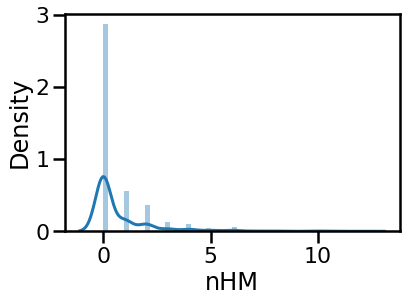

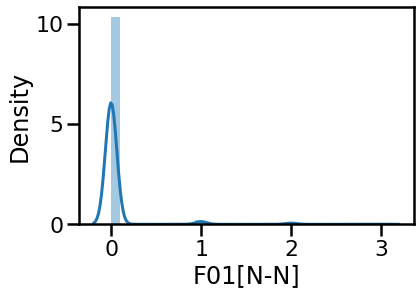

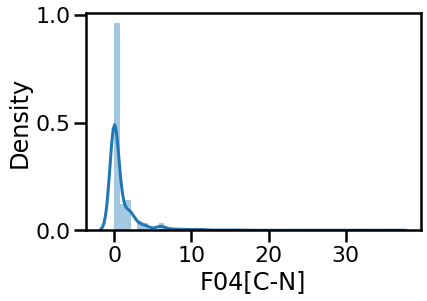

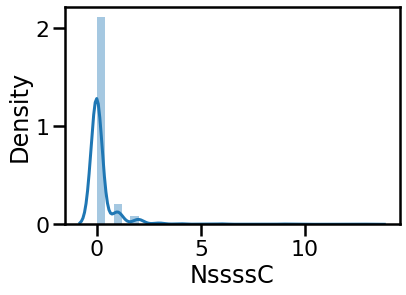

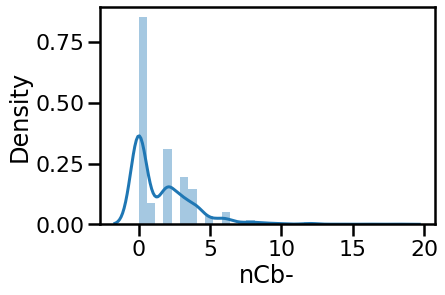

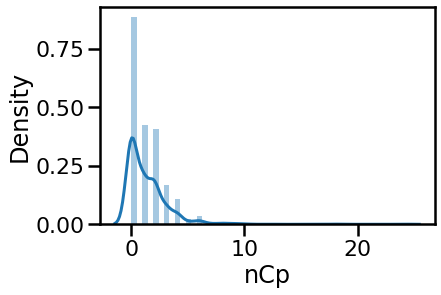

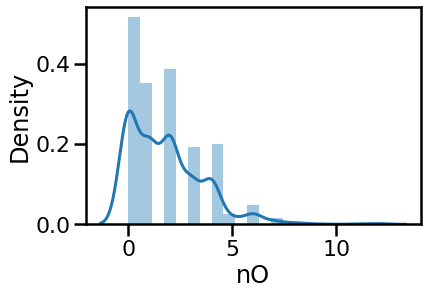

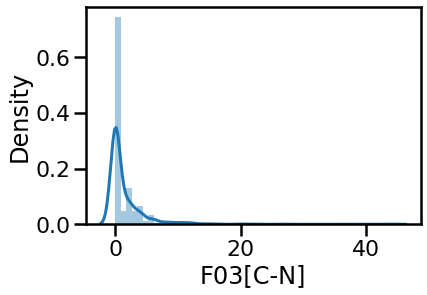

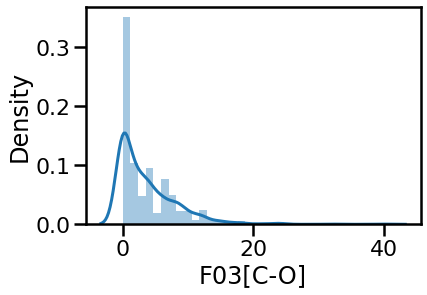

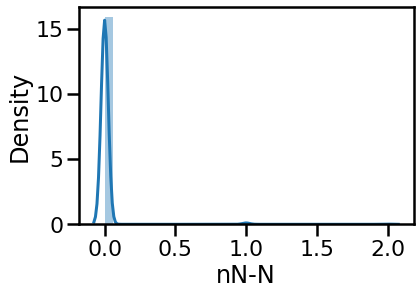

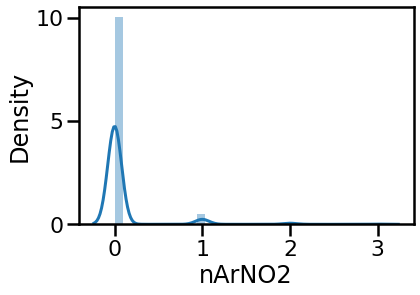

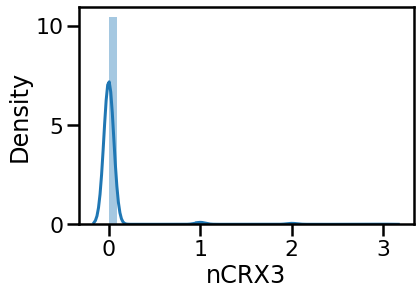

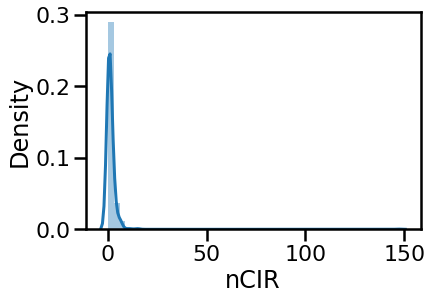

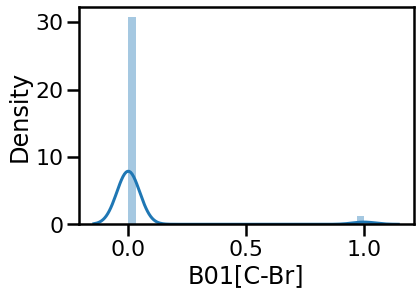

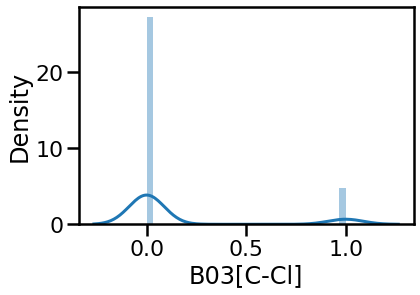

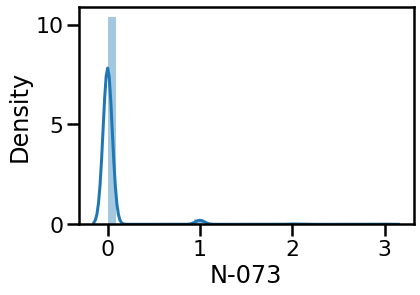

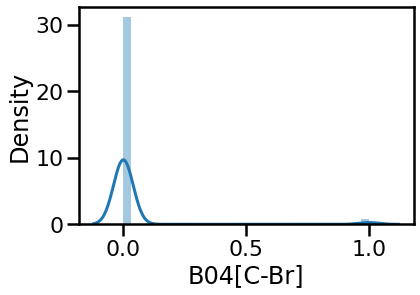

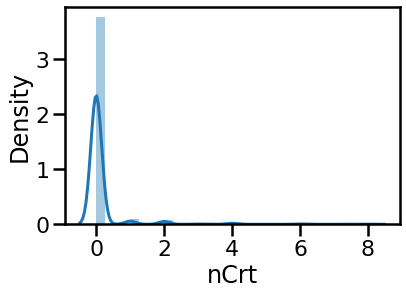

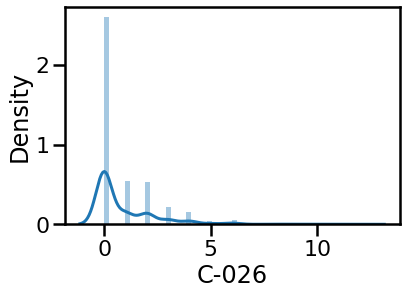

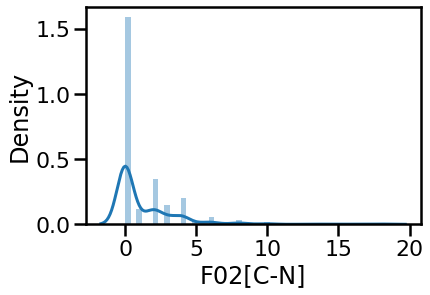

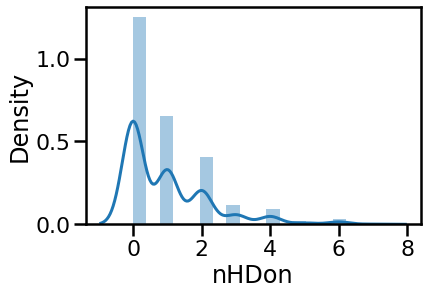

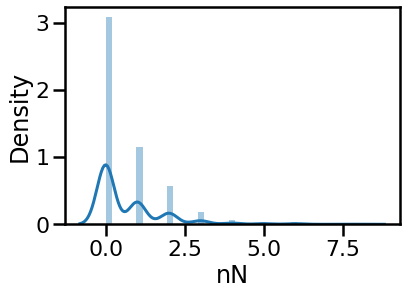

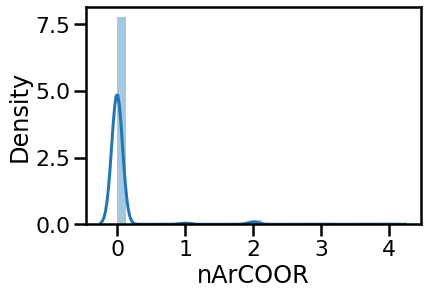

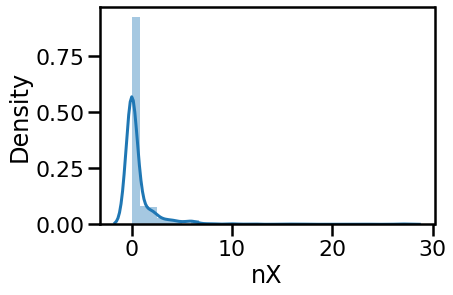

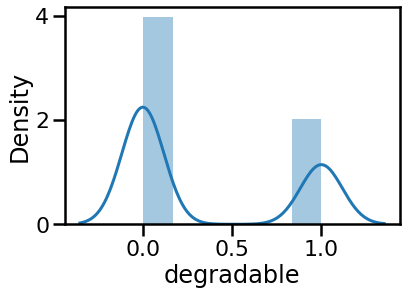

In [505]:
for col in df.select_dtypes('float64' and 'int'):
    plt.figure()
    sns.distplot(df[col])

## Bivariate Analysis
Identify Dependency

## Corellation Analysis
Identify collinearity

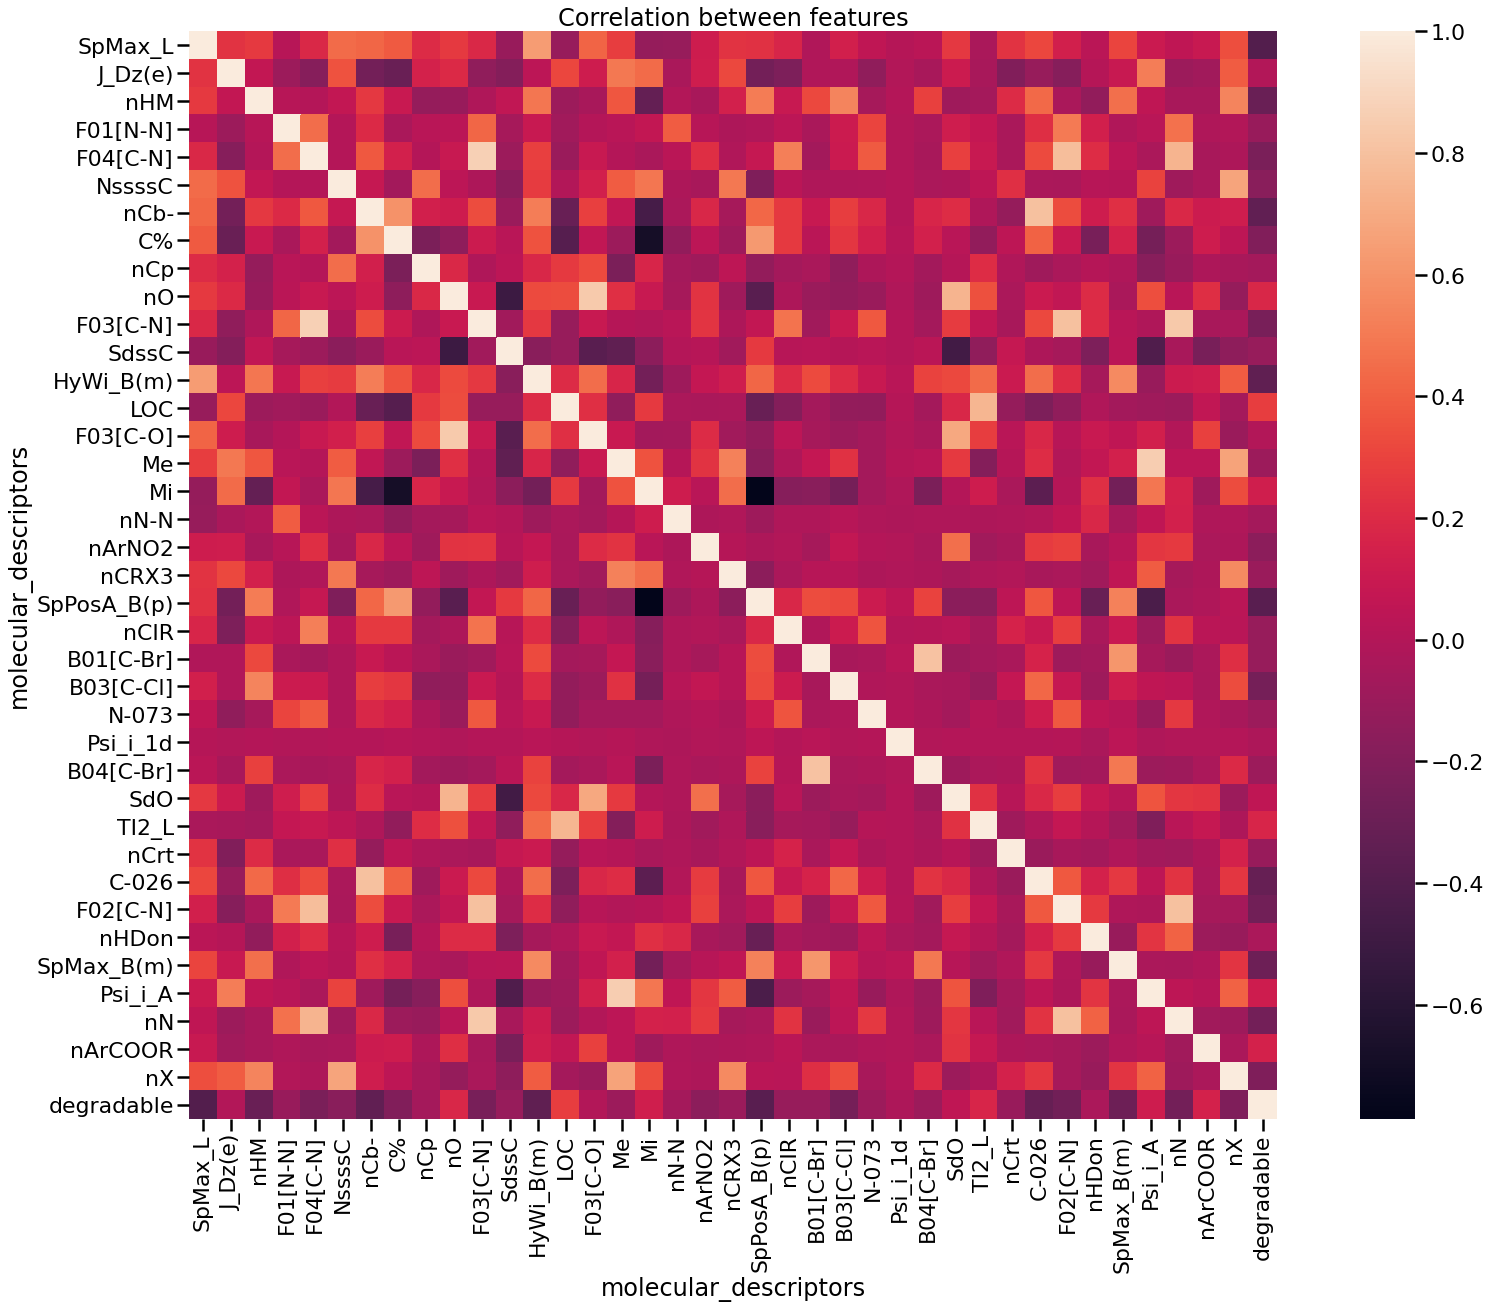

In [506]:
corrmat = df.corr()
plt.figure(figsize = (30, 20))
sns.heatmap(corrmat, square=True)
plt.title('Correlation between features');
plt.show()

In [507]:
#The first five features are the most positively correlated with SalePrice,
#while the next five are the most negatively correlated.


In [508]:
#Plot of the features that have the greatest impact on the price (Proud of this one)


<a name="Modeling">

# 6) Modeling
---


## 6.1 Features Selection (Wrapper)

In [509]:
from sklearn.feature_selection import SelectKBest, f_classif
kBest = SelectKBest(f_classif, k = 30)
X_kBestFeatures = kBest.fit_transform(X_transform, y)
X_kBestFeatures.shape

(1046, 30)

In [510]:
X_kBestFeatures = X_transform_pd.iloc[:, kBest.get_support(True)]
X_kBestFeatures.columns

Index(['SpMax_L', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-', 'C%', 'nO',
       'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L', 'Mi', 'nArNO2',
       'SpPosA_B(p)', 'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'SpMax_A', 'TI2_L',
       'nCrt', 'C-026', 'F02[C-N]', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)',
       'nArCOOR', 'nX'],
      dtype='object', name='molecular_descriptors')

ML Handling Imbalanced Data with SMOTE and near miss algorithm : geeksforgeeks
When to use SMOTE or ADASYN beofre or after train test split : Kaggle

## 6.2 Handling Imbalanced Data

In [511]:
print('Not Degradable', round(df['degradable'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Degradable', round(df['degradable'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not Degradable 66.26 % of the dataset
Degradable 33.74 % of the dataset


As seen before, we can see almost 2/3 of them are non-ready degradable while the rest of 1/3 of them are ready degradable.

There is an significant class imbalance. Class imbalance will lead to a bias towards the majority class. In this case we will perform an **overssampling** or **undersampling** method to equalise the data and choose one of them.

Let's try this initially without any method and let's see if this changes anything

A revoir : The SMOTE method has its weaknesses, the algorithm doesn't have any jitter, for minority class sample clouds with few enough points it tends to result in long "data lines". SMOTE can also do what we call a "bridge" which baiscally takes the main points cloud and a handful of outlier points and creates a giant line. So I want to make sure that it doesn't make this mistake by plotting but also try and remove the outliers.

In [512]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_kBestFeatures, y, test_size=0.30, random_state=6)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (732, 30)
Number transactions y_train dataset:  (732,)
Number transactions X_test dataset:  (314, 30)
Number transactions y_test dataset:  (314,)


In [513]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# logistic regression object
lr = LogisticRegression(random_state=30)
  
# train the model on train set
clf = lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       204
           1       0.79      0.71      0.75       110

    accuracy                           0.83       314
   macro avg       0.82      0.80      0.81       314
weighted avg       0.83      0.83      0.83       314



The recall of the minority class in very less. It proves that the model is more biased towards majority class. We can confirm this by seeing the f1-score. So, it proves that this is not the best model.

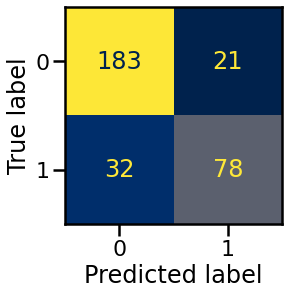

In [514]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

sns.set_context("poster")
disp = plot_confusion_matrix(clf, X_test, y_test, cmap = 'cividis', colorbar=False)

## 6.3 SMOTE 
SMOTE is an intelligent alternative to oversampling: rather than creating duplicates of the minority class, it creates synthetic data points that are relatively similar to the original ones.
Using SMOTE, the model start detected more cases of the minority class, which will result in an increased recall, but a decreased precision. 

In [515]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 246
Before OverSampling, counts of label '0': 486 

After OverSampling, the shape of train_X: (972, 30)
After OverSampling, the shape of train_y: (972,) 

After OverSampling, counts of label '1': 486
After OverSampling, counts of label '0': 486


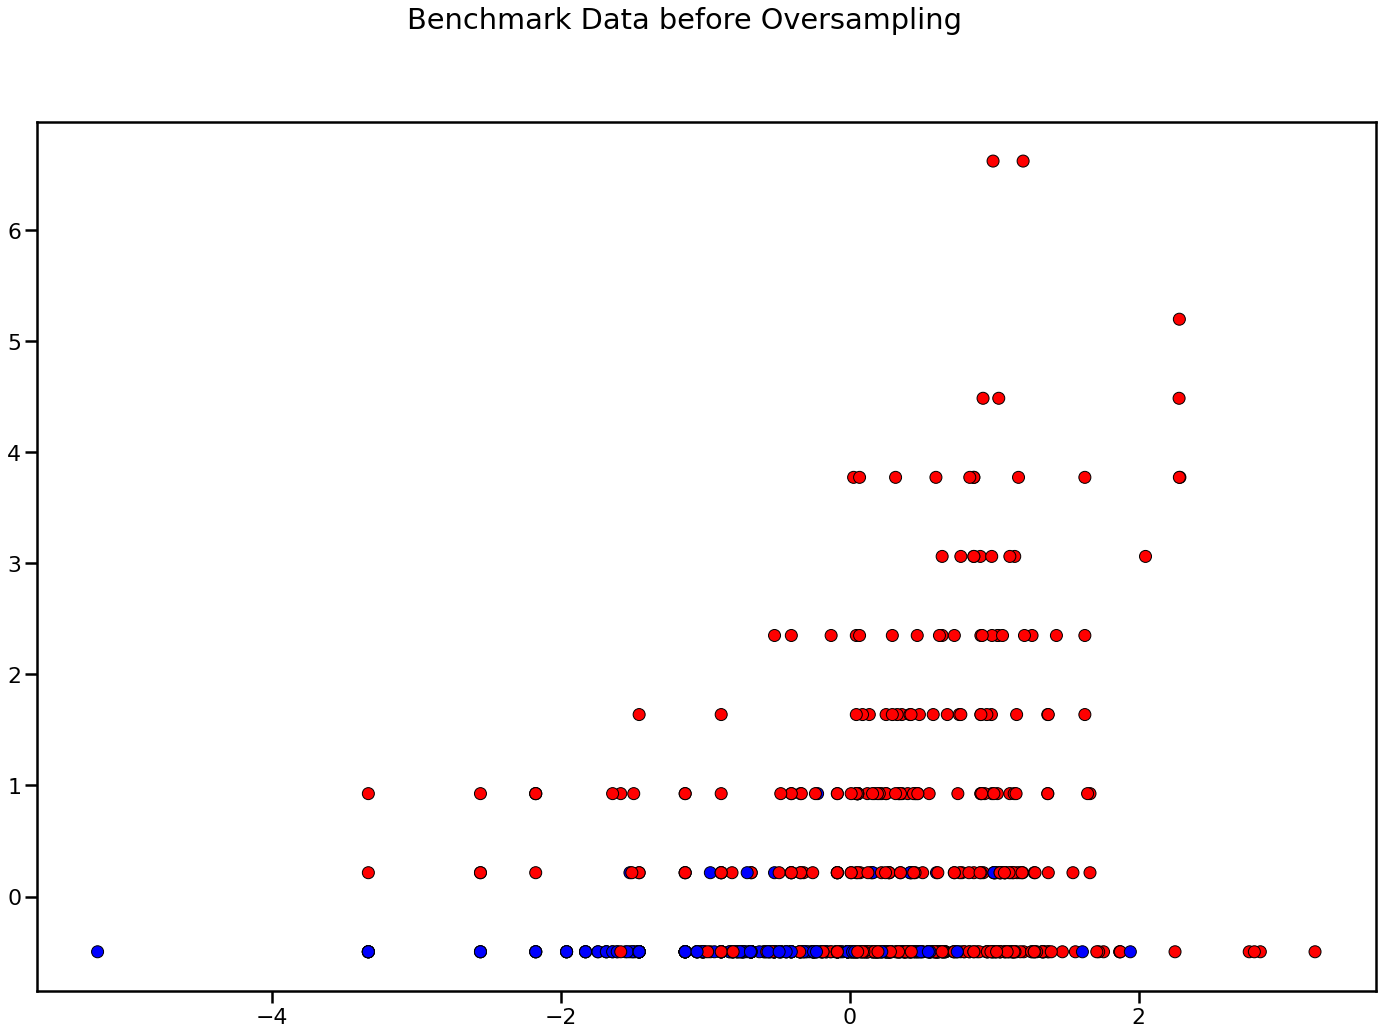

In [516]:
colors = ['red' if v == 0 else 'blue' for v in y_train]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data before Oversampling")
plt.show()

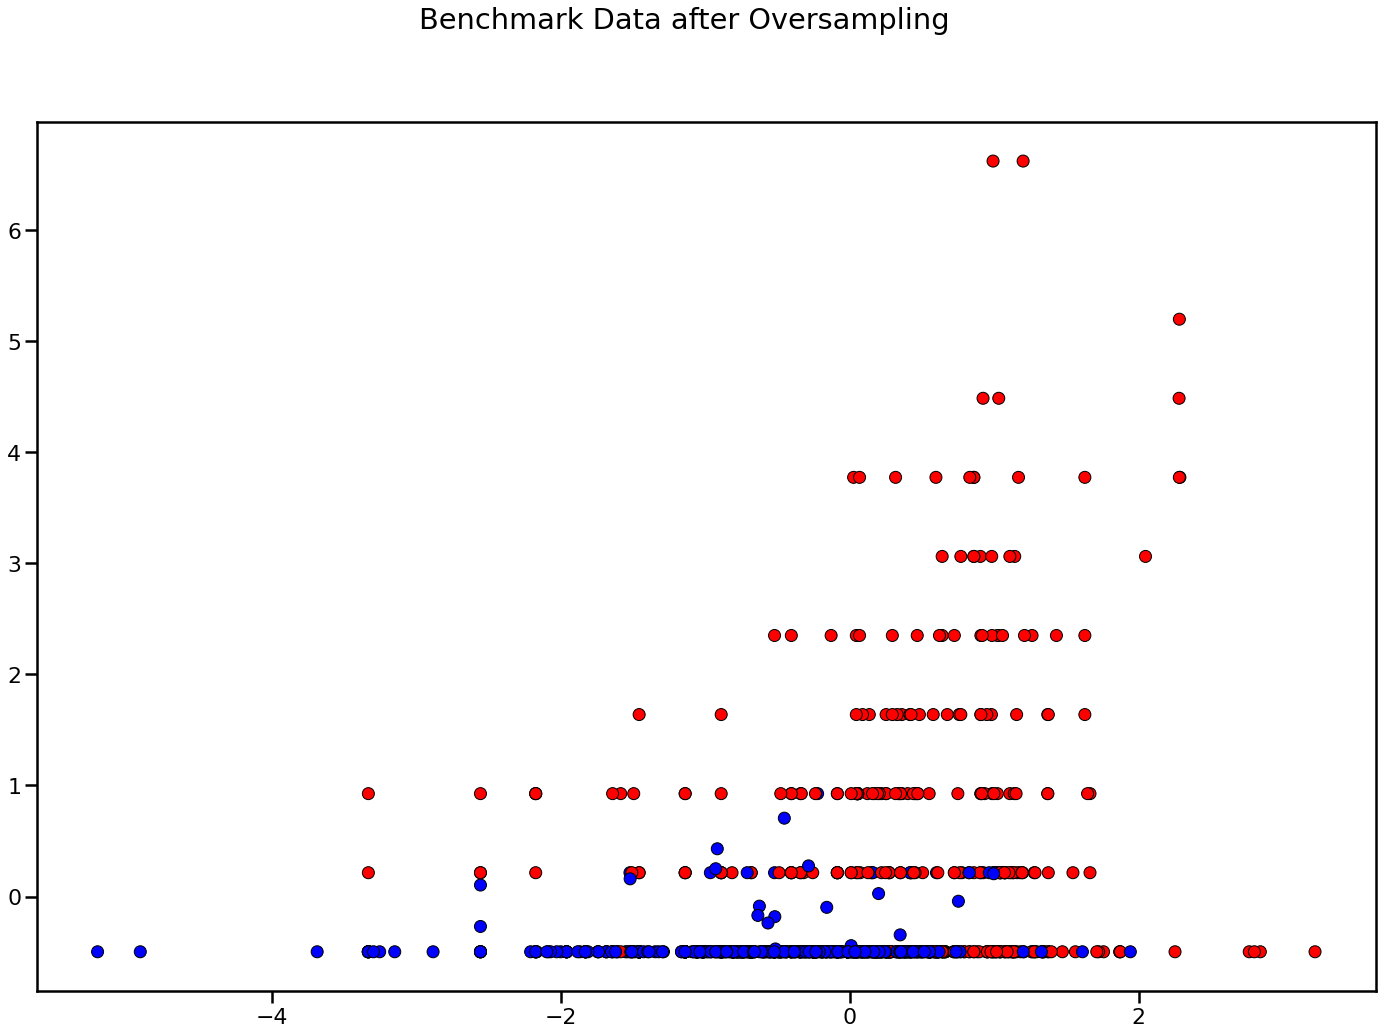

In [517]:
colors = ['red' if v == 0 else 'blue' for v in y_train_res]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train_res.iloc[:, 0], X_train_res.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data after Oversampling")
plt.show()

In [518]:
lr1 = LogisticRegression(random_state = 30)
clf_smote = lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       204
           1       0.72      0.78      0.75       110

    accuracy                           0.82       314
   macro avg       0.80      0.81      0.80       314
weighted avg       0.82      0.82      0.82       314



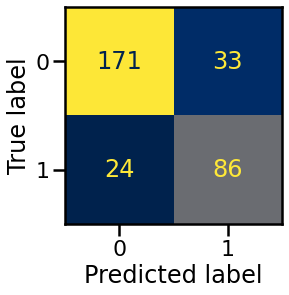

In [519]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

sns.set_context("poster")
disp = plot_confusion_matrix(clf_smote, X_test, y_test, cmap = 'cividis', colorbar=False)


Summary du Oversampling : With oversampling its **recall** has increased on the minority of class to 78 %

## 6.4 NearMiss Algorithm – Undersampling

In [520]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))


Before Undersampling, counts of label '1': 246
Before Undersampling, counts of label '0': 486 

After Undersampling, the shape of train_X: (492, 30)
After Undersampling, the shape of train_y: (492,) 

After Undersampling, counts of label '1': 246
After Undersampling, counts of label '0': 246


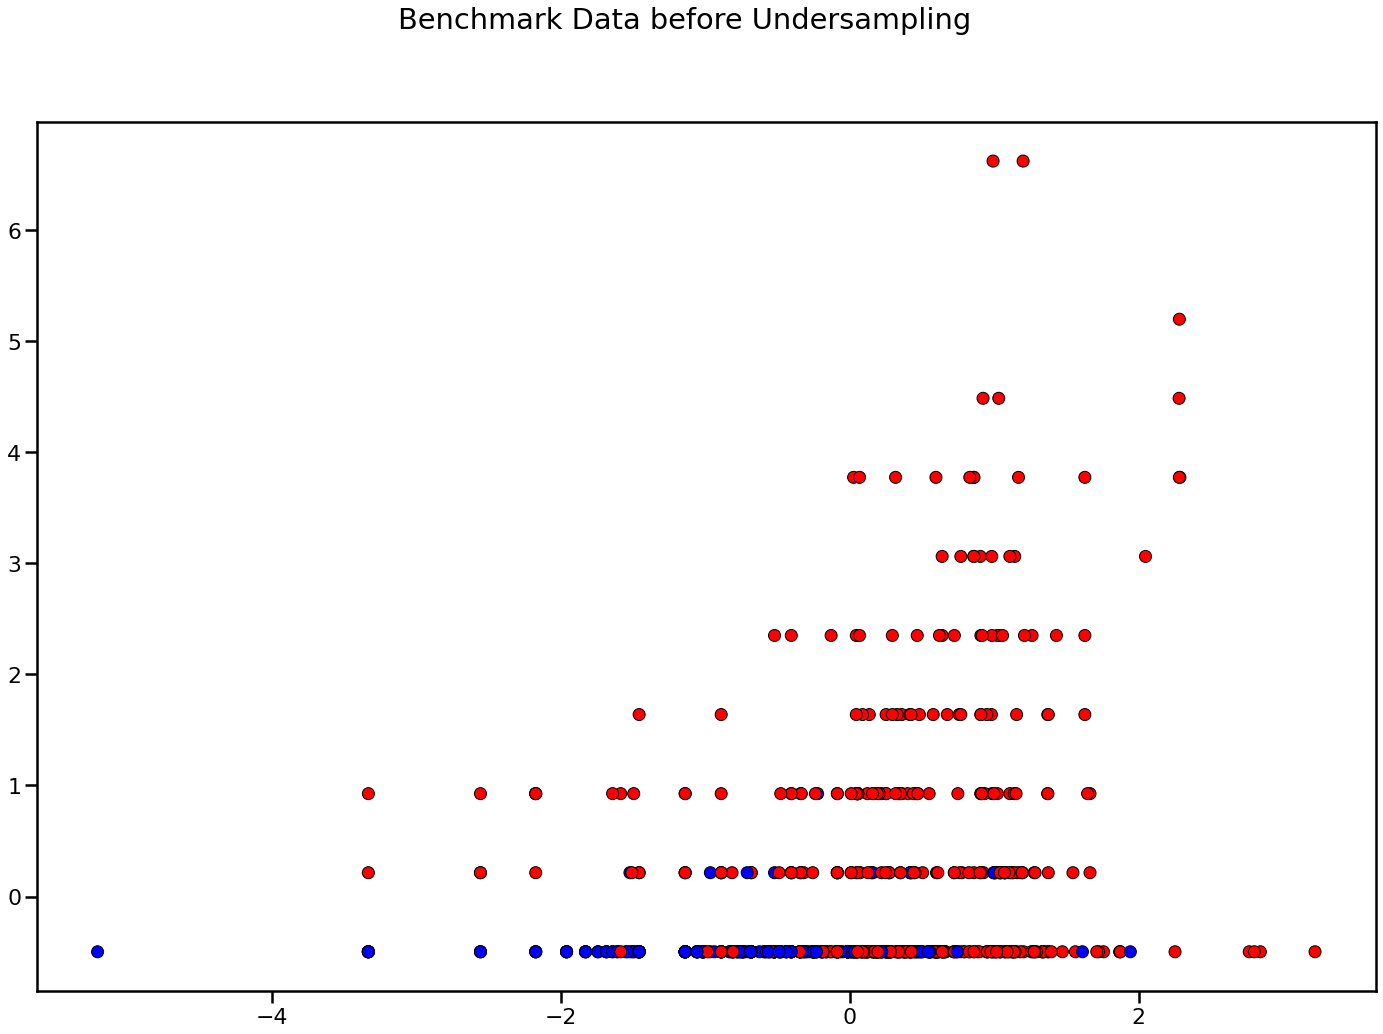

In [521]:
colors = ['red' if v == 0 else 'blue' for v in y_train]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data before Undersampling")
plt.show()

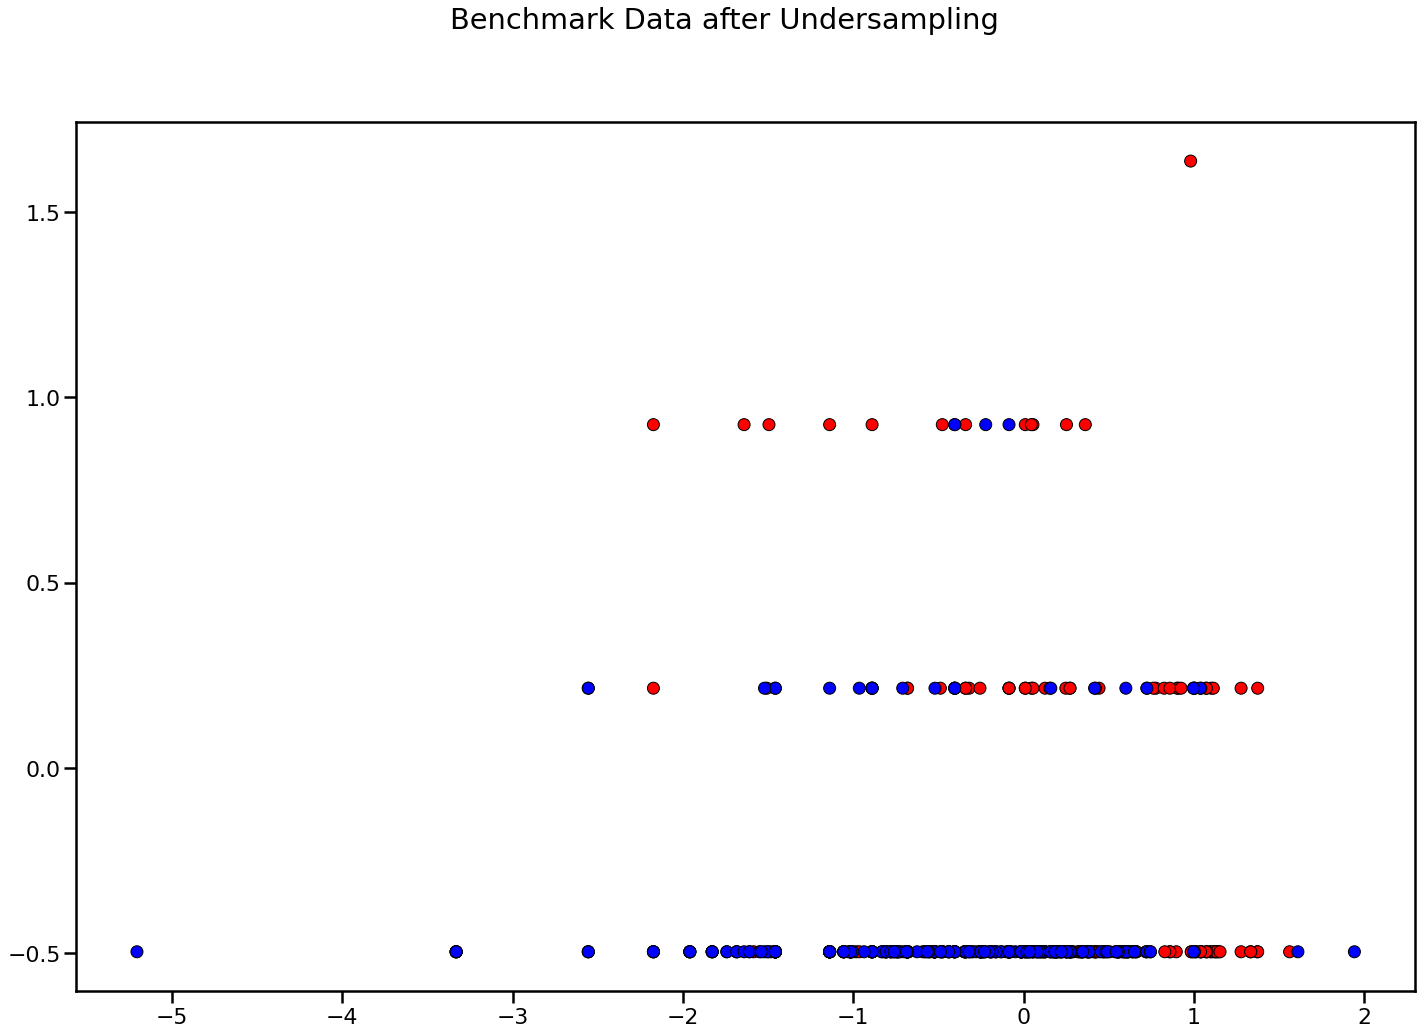

In [522]:
colors = ['red' if v == 0 else 'blue' for v in y_train_miss]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train_miss.iloc[:, 0], X_train_miss.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data after Undersampling")
plt.show()

In [523]:
# train the model on train set
lr2 = LogisticRegression(random_state = 30)
clf_miss = lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       204
           1       0.72      0.74      0.73       110

    accuracy                           0.81       314
   macro avg       0.79      0.79      0.79       314
weighted avg       0.81      0.81      0.81       314



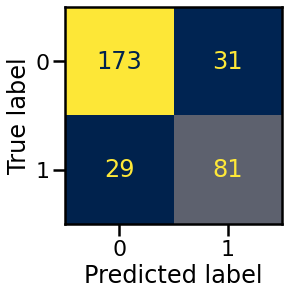

In [524]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

sns.set_context("poster")
disp = plot_confusion_matrix(clf_miss, X_test, y_test, cmap = 'cividis', colorbar=False)

### 6.5 Chosing the Oversampling method (SMOTE)

Due to undersampling of majority class with NearMiss algorithm, its recall has decreased to 75 % and the accuracy has only increased by 2 %. So in this case, SMOTE algorithm is giving me a better accuracy (+5%) and recall, I’ll go ahead and use this Data Augmentation method for this dataset.

In [525]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 486
After OverSampling, counts of label '0': 486


Undersampling the minority class gets you less data, and most classifiers' performance suffers with less data, I went with the Oversampling method with SMOTE.

I first used SMOTE and then split the data into train test split. The results were really good, the confusion matrix and classification report were really good. As I understood the problem with this approach is that the new synthetically created observations from the minority class in the training dataset might end up in the testing dataset. This in a way allows the algorithm to cheat since it learned from something similar and now is testing on almost very similar data points.

When the model is in production, it’s predicting on unseen data. The main point of model validation is to estimate how the model will generalize to new data. If the decision to put a model into production is based on how it performs on a validation set, it’s critical that oversampling is done correctly.

The reason we are trying to develop a machine learning model here is to identify the non degradable event and with SMOTE we are doing a worse job in finding those non degradable instances.
But, with a greater imbalanced ratio, the decision function favor the class with the larger number of samples, usually referred as the majority class. Roughly speaking, weight of class began depends on count samples. Also, we can't use some metrics, like **accuracy**, if we have disproportion of samples. Here we are trying to get the best accuracy on a fiable model. 


### Note
When you use any sampling technique you divide your data first and then apply synthetic sampling on the training data only. After you do the training, yuo use the test set which contains only original samples) to evaluate.

The risk if i use the other strategy is that the original sample in training (testing)and the synthetic sample (that was created based on this original sample) in the test(training) set.


## 6.2) Importing Models

In [526]:
import pandas as pd
pd.set_option('use_inf_as_na', True)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## Model Selection
Model selection is the process of selecting one final machine learning model from among a collection of candidate machine learning models for a training dataset.

In [531]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [532]:
LR = LogisticRegression(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [533]:
decision_tree = DecisionTreeClassifier(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [534]:
SVM = SVC(probability = True, random_state=30)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [535]:
LDA = LinearDiscriminantAnalysis(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

scores = cross_validate(LDA, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [536]:
QDA = QuadraticDiscriminantAnalysis(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [538]:
random_forest = RandomForestClassifier(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [539]:
KNN = KNeighborsClassifier(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [540]:
bayes = GaussianNB(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [551]:
models_initial = pd.DataFrame({
    'Models'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Models', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

In [552]:
models_initial.sort_values(by='Accuracy', ascending=False, ignore_index=True)

,Models,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Random Forest,0.137568,0.012083,0.918899,0.924479,0.919042,0.918529,0.969146
1,Support Vector Machine,0.134444,0.006738,0.903316,0.907757,0.903375,0.902998,0.962090
2,Logistic Regression,0.018197,0.003748,0.886947,0.890243,0.887000,0.886702,0.945135
3,Linear Discriminant Analysis,0.004015,0.003534,0.879847,0.884668,0.879750,0.879388,0.938066
4,K-Nearest Neighbors,0.000918,0.006013,0.877657,0.886081,0.877583,0.876782,0.943837
5,Quadratic Discriminant Analysis,0.002297,0.004095,0.870387,0.879897,0.870417,0.869484,0.945299
6,Decision Tree,0.008974,0.003919,0.849065,0.856644,0.849167,0.848083,0.849167
7,Bayes,0.001184,0.003016,0.820855,0.841253,0.820750,0.817587,0.924976


In [553]:
models_initial.sort_values(by='Precision', ascending=False, ignore_index=True)

,Models,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Random Forest,0.137568,0.012083,0.918899,0.924479,0.919042,0.918529,0.969146
1,Support Vector Machine,0.134444,0.006738,0.903316,0.907757,0.903375,0.902998,0.962090
2,Logistic Regression,0.018197,0.003748,0.886947,0.890243,0.887000,0.886702,0.945135
3,K-Nearest Neighbors,0.000918,0.006013,0.877657,0.886081,0.877583,0.876782,0.943837
4,Linear Discriminant Analysis,0.004015,0.003534,0.879847,0.884668,0.879750,0.879388,0.938066
5,Quadratic Discriminant Analysis,0.002297,0.004095,0.870387,0.879897,0.870417,0.869484,0.945299
6,Decision Tree,0.008974,0.003919,0.849065,0.856644,0.849167,0.848083,0.849167
7,Bayes,0.001184,0.003016,0.820855,0.841253,0.820750,0.817587,0.924976


In [554]:
models_initial.sort_values(by='Recall', ascending=False, ignore_index=True)

,Models,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Random Forest,0.137568,0.012083,0.918899,0.924479,0.919042,0.918529,0.969146
1,Support Vector Machine,0.134444,0.006738,0.903316,0.907757,0.903375,0.902998,0.962090
2,Logistic Regression,0.018197,0.003748,0.886947,0.890243,0.887000,0.886702,0.945135
3,Linear Discriminant Analysis,0.004015,0.003534,0.879847,0.884668,0.879750,0.879388,0.938066
4,K-Nearest Neighbors,0.000918,0.006013,0.877657,0.886081,0.877583,0.876782,0.943837
5,Quadratic Discriminant Analysis,0.002297,0.004095,0.870387,0.879897,0.870417,0.869484,0.945299
6,Decision Tree,0.008974,0.003919,0.849065,0.856644,0.849167,0.848083,0.849167
7,Bayes,0.001184,0.003016,0.820855,0.841253,0.820750,0.817587,0.924976


In [555]:
models_initial.sort_values(by='AUC_ROC', ascending=False, ignore_index=True)

,Models,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Random Forest,0.137568,0.012083,0.918899,0.924479,0.919042,0.918529,0.969146
1,Support Vector Machine,0.134444,0.006738,0.903316,0.907757,0.903375,0.902998,0.962090
2,Quadratic Discriminant Analysis,0.002297,0.004095,0.870387,0.879897,0.870417,0.869484,0.945299
3,Logistic Regression,0.018197,0.003748,0.886947,0.890243,0.887000,0.886702,0.945135
4,K-Nearest Neighbors,0.000918,0.006013,0.877657,0.886081,0.877583,0.876782,0.943837
5,Linear Discriminant Analysis,0.004015,0.003534,0.879847,0.884668,0.879750,0.879388,0.938066
6,Bayes,0.001184,0.003016,0.820855,0.841253,0.820750,0.817587,0.924976
7,Decision Tree,0.008974,0.003919,0.849065,0.856644,0.849167,0.848083,0.849167


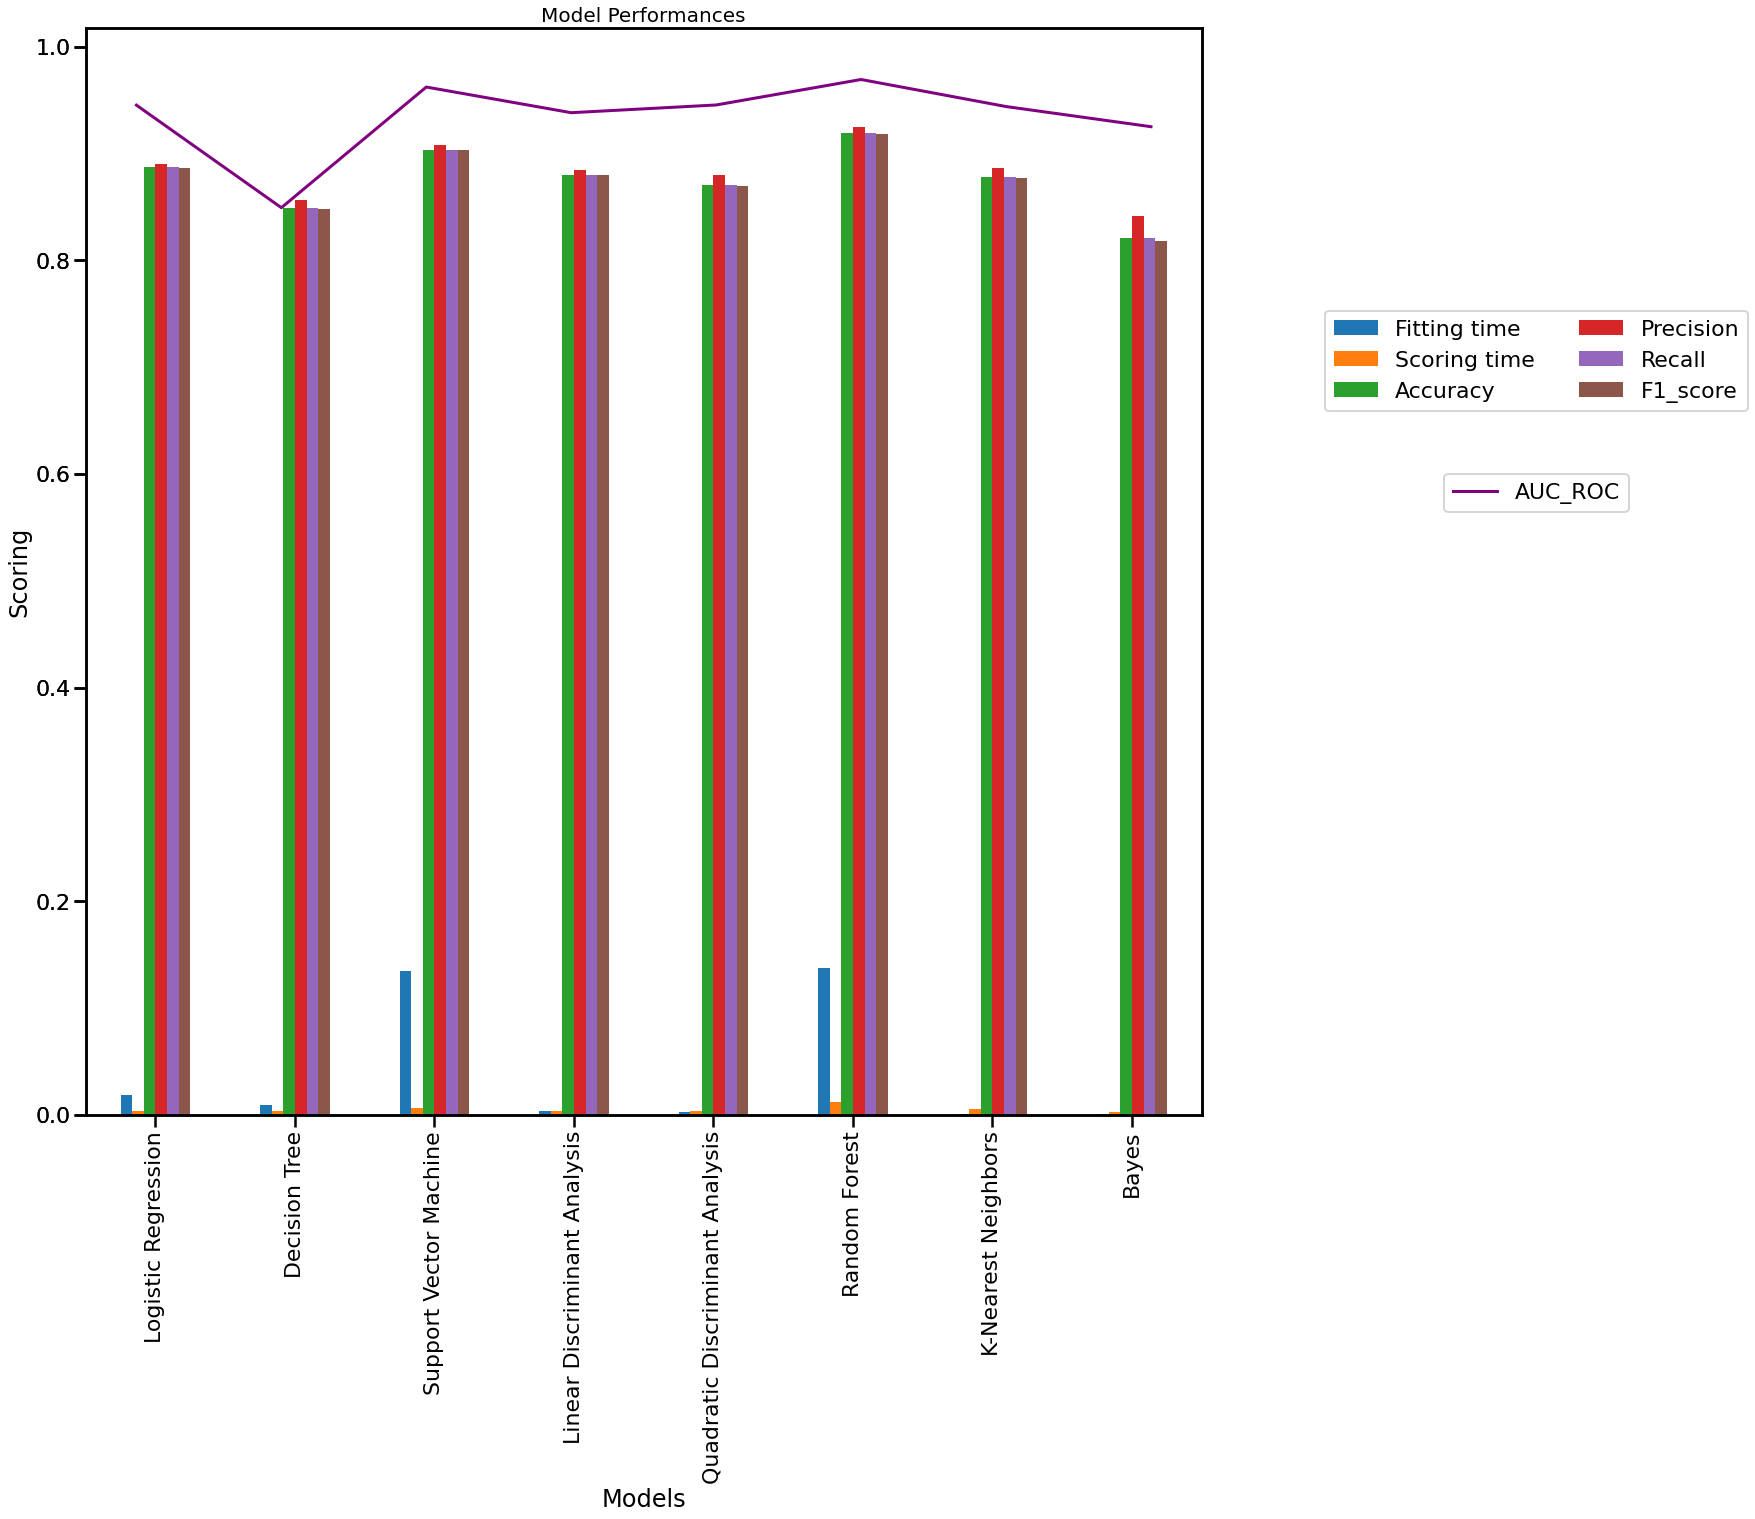

In [556]:
# Seperate into two data frame (performance_metric and AUC_ROC_performance) 
models_initial.index = models_initial['Models']
performance_metric = models_initial
AUC_ROC_performance = models_initial['AUC_ROC']
performance_metric = performance_metric.drop(columns = 'AUC_ROC')

# Bar plot the performance_metric
ax1 = performance_metric.plot.bar()
plt.legend(loc="upper center", bbox_to_anchor=(1.3, 0.75), ncol=2)

# Line plot the AUC_ROC_performance in the same figure
ax2 = ax1.twiny()
ax2 = AUC_ROC_performance.plot.line(figsize=(20,20),color='purple')
plt.xticks([])
plt.xlabel('')

# Adjustment of the plotting
plt.xticks(rotation=90)
plt.legend(loc="upper center", bbox_to_anchor=(1.3, 0.60), ncol=2)
plt.ylabel("Scoring")
plt.title("Model Performances", fontdict = {"fontsize": 20} )
plt.show()

## Testing Models

In [547]:
from sklearn.model_selection import GridSearchCV

In [548]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_res, y_train_res, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train_res)
        clf_report = pd.DataFrame(classification_report(y_train_res, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_res, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_res, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Support Vector Machine

In [588]:
%%time

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=30)

params = {"C":(0.1, 0.5, 1, 2, 3, 5, 10, 20), 
          "gamma":(0.001, 0.02, 0.01, 0.1, 0.2, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=4, verbose=1, scoring="accuracy")
svm_cv.fit(X_train_res, y_train_res)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params, random_state=30)
svm_clf.fit(X_train_res, y_train_res)

print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
Best params: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 95.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.962733    0.957055  0.959877    0.959894      0.959894
recall       0.956790    0.962963  0.959877    0.959877      0.959877
f1-score     0.959752    0.960000  0.959877    0.959876      0.959876
support    486.000000  486.000000  0.959877  972.000000    972.000000
_______________________________________________
Confusion Matrix: 
 [[465  21]
 [ 18 468]]

Test Result:
Accuracy Score: 85.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.884058    0.803738  0.856688    0.843898      0.855921
recall       0.897059    0.781818  0.856688    0.839439      0.856688
f1-score     0.89

### Random Forest Classifier

In [587]:
%%time

n_estimators = [1200, 1400, 1600, 2000]
max_features = [2, 3]
max_depth = [40,50,60,70]
min_samples_split = [9, 10, 11]
min_samples_leaf = [1,2]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
              }

rf_clf = RandomForestClassifier(random_state=30)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)
rf_cv.fit(X_train_res, y_train_res)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params, random_state=30)
rf_clf.fit(X_train_res, y_train_res)

print_score(rf_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(rf_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best parameters: {'max_depth': 40, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1600}
Train Result:
Accuracy Score: 97.84%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.977413    0.979381  0.978395    0.978397      0.978397
recall       0.979424    0.977366  0.978395    0.978395      0.978395
f1-score     0.978417    0.978373  0.978395    0.978395      0.978395
support    486.000000  486.000000  0.978395  972.000000    972.000000
_______________________________________________
Confusion Matrix: 
 [[476  10]
 [ 11 475]]

Test Result:
Accuracy Score: 86.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.874419    0.838384  0.863057    0.856401      0.861795
recall       0.92

You need to check the accuracy difference between train and test set for each fold result. If your model gives you high training accuracy but low test accuracy so your model is overfitting. If your model does not give good training accuracy you can say your model is underfitting.

# Conclusion